In [25]:
import numpy as np 
import pandas as pd 
from keras.models import Model, load_model
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
#load the numpy arrays from disk
X_train = np.load('/media/amendoza/HDD/ECG LVAD candidacy/datasets/single_lead/X_train.npy')
X_val = np.load('/media/amendoza/HDD/ECG LVAD candidacy/datasets/single_lead/X_val.npy')
X_test = np.load('/media/amendoza/HDD/ECG LVAD candidacy/datasets/single_lead/X_test.npy')
y_train = np.load('/media/amendoza/HDD/ECG LVAD candidacy/datasets/single_lead/y_train.npy')
y_val = np.load('/media/amendoza/HDD/ECG LVAD candidacy/datasets/single_lead/y_val.npy')
y_test = np.load('/media/amendoza/HDD/ECG LVAD candidacy/datasets/single_lead/y_test.npy')

In [5]:
model = load_model('/media/amendoza/HDD/ECG LVAD candidacy/single_lead_Model/single-lead-model24_2_22.keras')

2024-02-22 21:42:35.121701: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 848 MB memory:  -> device: 0, name: NVIDIA RTX 6000 Ada Generation, pci bus id: 0000:55:00.0, compute capability: 8.9


In [10]:
y_pred = model.predict(X_test, batch_size=1000)

8/8 [==============================] - 0s 3ms/step


In [17]:
from sklearn.preprocessing import OneHotEncoder

#Convert y to one hot encoding 
ohe = OneHotEncoder(sparse_output=False)
y_train = ohe.fit_transform(y_train.reshape(-1,1))
y_val = ohe.fit_transform(y_val.reshape(-1,1))
y_test = ohe.transform(y_test.reshape(-1,1))

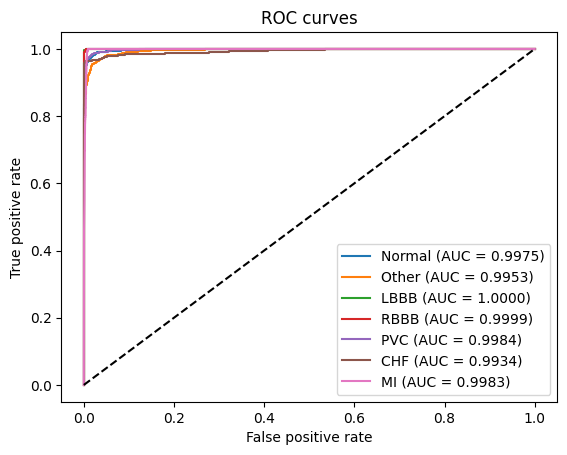

In [23]:

from sklearn.metrics import roc_curve, roc_auc_score
n_classes = 7
class_names = ['Normal','Other','LBBB','RBBB', 'PVC', 'CHF', 'MI']
# plot ROC curves for each class
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test[:, i], y_pred[:, i])
    auc = roc_auc_score(y_test[:, i], y_pred[:, i])
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {auc:.4f})')

# plot random guessing line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curves')
plt.legend()
plt.show()

In [26]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1039
           1       0.95      0.90      0.92      1039
           2       1.00      1.00      1.00      1039
           3       1.00      0.98      0.99      1039
           4       0.97      0.94      0.96      1039
           5       0.99      0.96      0.97      1044
           6       0.95      1.00      0.97      1057

    accuracy                           0.96      7296
   macro avg       0.97      0.96      0.96      7296
weighted avg       0.97      0.96      0.96      7296

